In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
exp = pd.read_csv('../data/Carbs_SCFA_all_Exp.csv',index_col=0)
pre = pd.read_csv('../data/Carbs_SCFA_All_Prediction.csv',index_col=0)

In [3]:
print(exp)

           Acetate  Propionate  Butyrate  Ac_error  Prop_error  But_error
Carbs                                                                    
FOS             82          12         6         6           5          0
Lactulose       89           3         8         0           0          1
Pectin          74          19         8         1           0          0
Lactitol        66          13        21         3           1          2


In [4]:
print(pre)

            Acetate  Propionate  Butyrate
Carbs                                    
FOS        0.795794    0.130613  0.073593
Lactulose  0.861494    0.045680  0.092826
Pectin     0.710743    0.196075  0.093182
Lactitol   0.609252    0.161822  0.228926


[0 2 4]
[1 3 5]
[ 7  9 11]
[ 8 10 12]
[14 16 18]
[15 17 19]
[21 23 25]
[22 24 26]


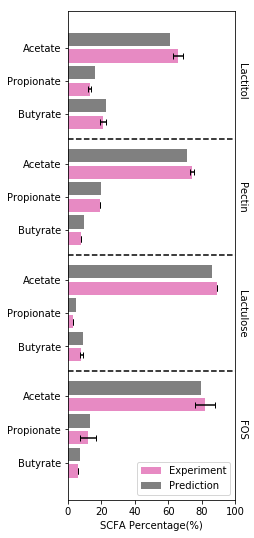

In [80]:
fig, ax1 = plt.subplots(figsize=(3,9))

y0 = np.arange(3)*2
y1 = y0+1

tick_pos = list()

tick_pos_sub = list()
tick_labels = list()

xlim = [0,100]

m, err = ['Butyrate','Propionate','Acetate'],['But_error','Prop_error','Ac_error']

for ind in exp.index:
    if ind == exp.index[0]:
        ax1.barh(y1,pre.loc[ind,m]*100,color='gray',height=0.8,label='Prediction')
        ax1.barh(y0,exp.loc[ind,m],xerr=exp.loc[ind,err],color='#e78ac3',height=0.8,label='Experiment',capsize=3)
        
    else:
        ax1.barh(y1,pre.loc[ind,m]*100,color='gray',height=0.8)
        ax1.barh(y0,exp.loc[ind,m],xerr=exp.loc[ind,err],color='#e78ac3',height=0.8,capsize=3)

    tick_pos.append(np.mean(y0+y1)/2)
    
    tick_pos_sub += list((y0+y1)/2)
    tick_labels += list(m)
    
    if ind!= exp.index[-1]:plt.plot(xlim,[y1[-1]+1]*2,'k--')
    
    print(y0)
    print(y1)
    
    y0 += 7
    y1 += 7
plt.xlim(xlim)
plt.yticks(tick_pos_sub,tick_labels)

plt.legend()
for i,y in enumerate(tick_pos):
    plt.text(101,y,exp.index[i],rotation=-90,va='center')
#plt.yticks(tick_pos,exp.index,rotation=90,va='center')
plt.xlabel('SCFA Percentage(%)')
plt.savefig('../figures/barplot.pdf',bbox_inches='tight')
plt.show()